# Importing required libraries

### In this file, we will analyze the Uber data. Our main purpose is to:

    --> Check how long do people travel with uber.
    --> What hour do most people take uber to their destination?
    --> Check the purpose of trips.
    --> Which day has the heighest number of trips
    --> What are the number of trips per each day?
    --> What are the trips in the month?
    --> Where do people start boarding their trip from most?

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime
import calendar

In [3]:
df = pd.read_csv("Uber Drives.csv")

In [4]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [5]:
df.isnull()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1151,False,False,False,False,False,False,False
1152,False,False,False,False,False,False,False
1153,False,False,False,False,False,False,False
1154,False,False,False,False,False,False,False


In [6]:
df.isnull().value_counts()

START_DATE*  END_DATE*  CATEGORY*  START*  STOP*  MILES*  PURPOSE*
False        False      False      False   False  False   False       653
                                                          True        502
             True       True       True    True   False   True          1
Name: count, dtype: int64

In [7]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain


In [11]:
df.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [14]:
df.dtypes


START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [16]:
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'],format='%m/%d/%Y %H:%M')
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'],format='%m/%d/%Y %H:%M')

In [17]:
df.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [19]:
hour = []
day = []
dayofweek = []
month = []
year = []
weekday = []

for x in df['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    year.append(x.year)
    weekday.append(calendar.day_name[x.dayofweek])



df['HOUR'] = hour
df['DAY'] = day
df['MONTH'] = month
df['DAYOFWEEK'] = dayofweek
df['YEAR'] = year
df['WEEKDAY'] = weekday

In [20]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,HOUR,DAY,MONTH,DAYOFWEEK,YEAR,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,4,2016,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,5,2016,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,2016,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,2,2016,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,2,2016,Wednesday


### Checking the categorical values

In [21]:
df['CATEGORY*'].value_counts()

CATEGORY*
Business    647
Personal      6
Name: count, dtype: int64

<Axes: xlabel='CATEGORY*', ylabel='count'>

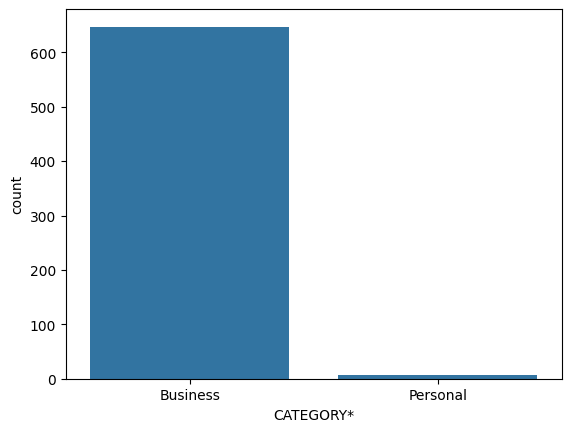

In [25]:
sns.barplot(df['CATEGORY*'].value_counts())

## Check how long do people travel with Uber

<Axes: ylabel='Frequency'>

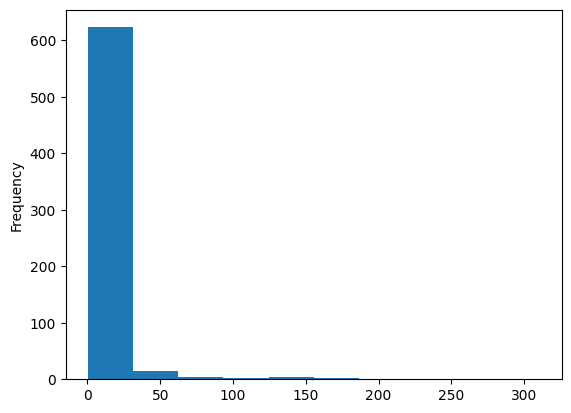

In [32]:
df['MILES*'].plot.hist()

### What hour do most people take uber to their destination?

Text(0.5, 1.0, 'Hours vs Frequency')

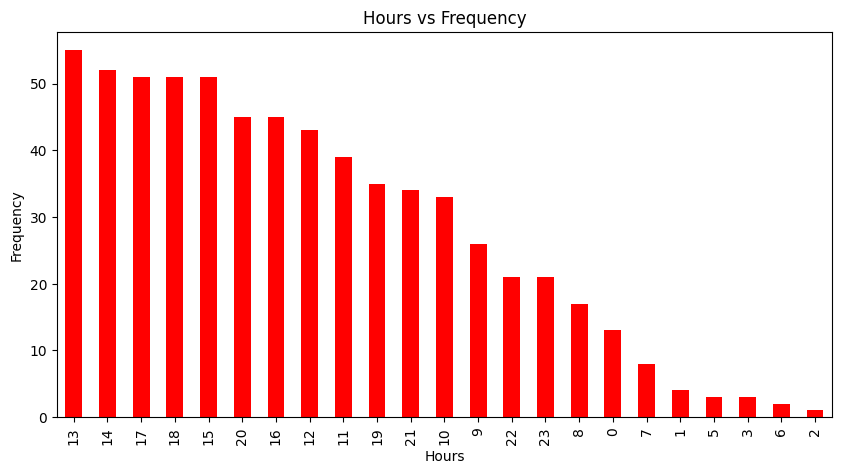

In [33]:
hours = df['START_DATE*'].dt.hour.value_counts()
hours.plot(kind='bar',color='red',figsize=(10,5))

plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Hours vs Frequency')

### Check the purposes of their trips

<Axes: xlabel='PURPOSE*'>

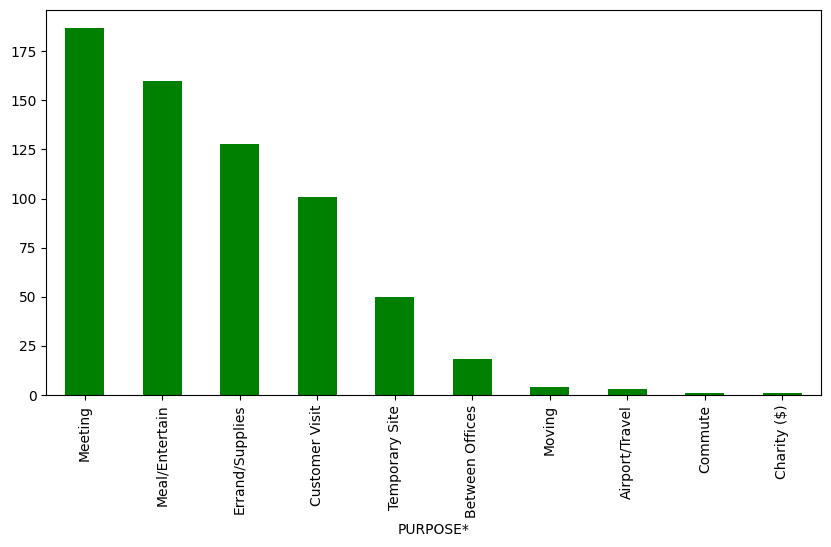

In [34]:
df['PURPOSE*'].value_counts().plot(kind='bar',color='green',figsize=(10,5))

### Which day has the highest number of trips?

<Axes: xlabel='WEEKDAY'>

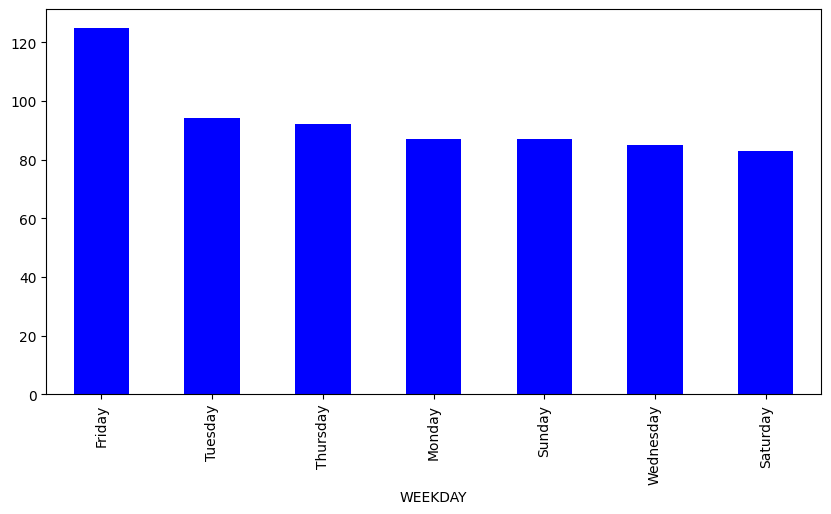

In [36]:
df['WEEKDAY'].value_counts().plot(kind='bar',color='blue',figsize=(10,5))

### What the number of trips each per day?


<Axes: xlabel='DAY'>

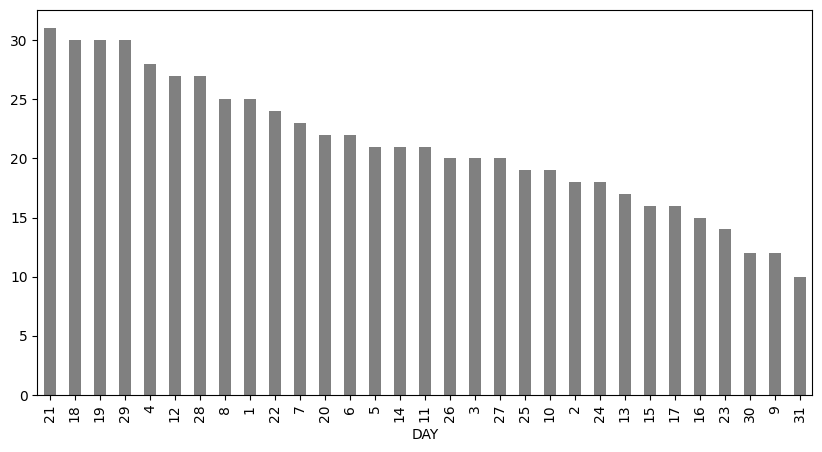

In [37]:
df['DAY'].value_counts().plot(kind='bar',color='grey',figsize=(10,5))

### Find the month in which people travel most with the uber

<Axes: xlabel='MONTH'>

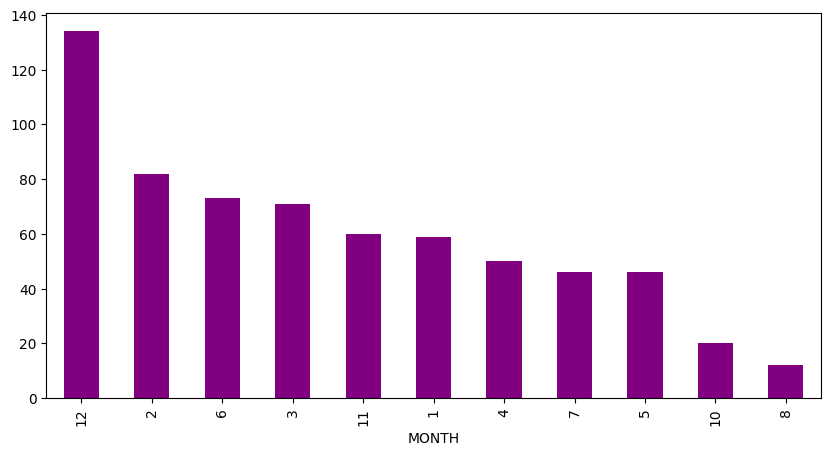

In [41]:
df['MONTH'].value_counts().plot(kind='bar',color='purple',figsize=(10,5))

### Where do people start boarding their trip from most?

<Axes: xlabel='START*'>

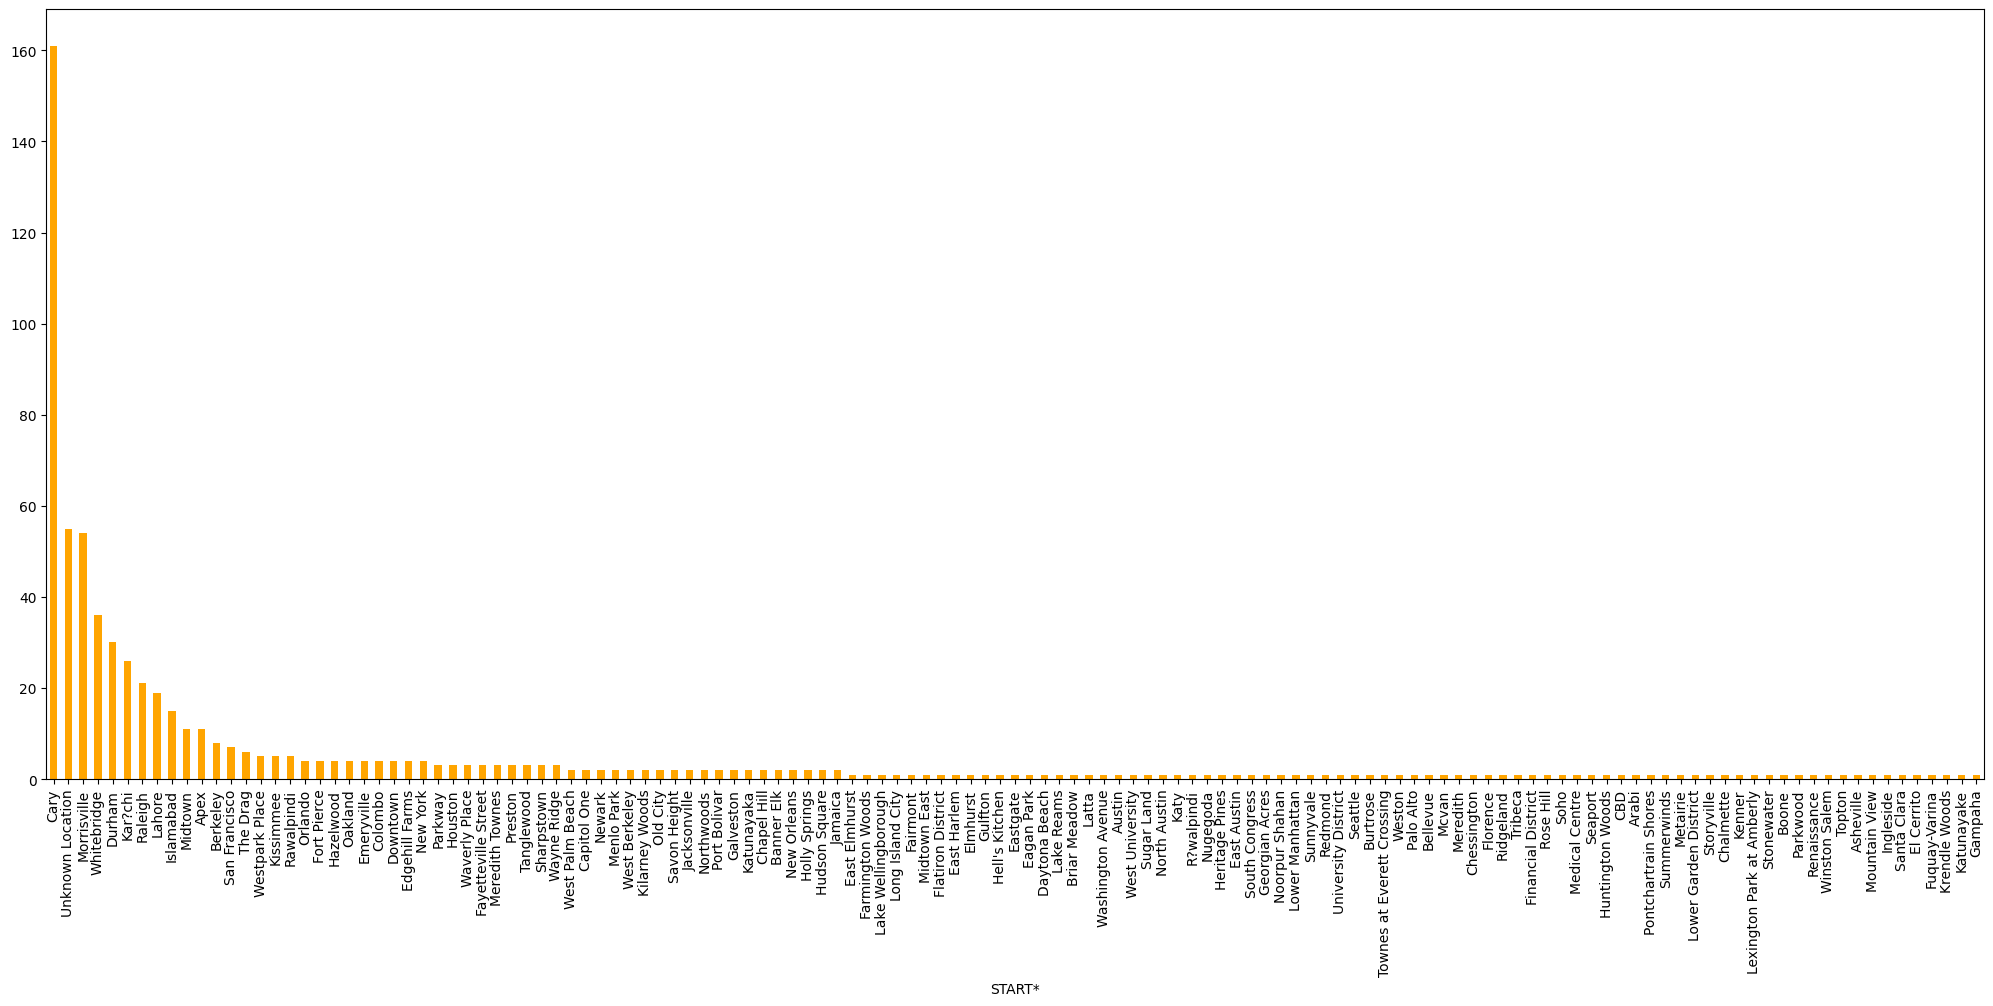

In [44]:
df['START*'].value_counts().plot(kind='bar',color='orange',figsize=(25,10))